<a href="https://colab.research.google.com/github/thivyadharshini-03/CODSOFT/blob/main/CodSoft_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS (2).csv to IRIS (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('IRIS (2).csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape[1]

5

In [ ]:
data.shape[0]


150

In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data.describe(include='all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

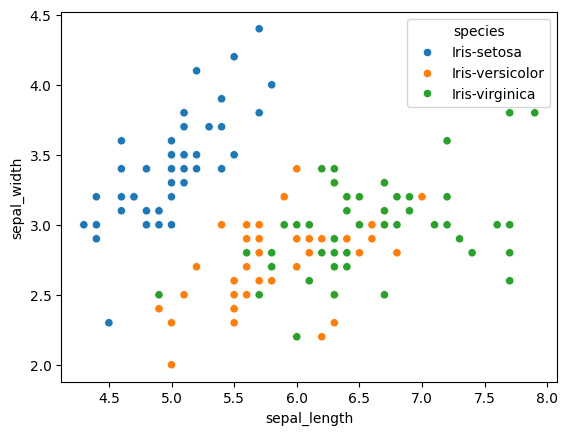

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=data)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

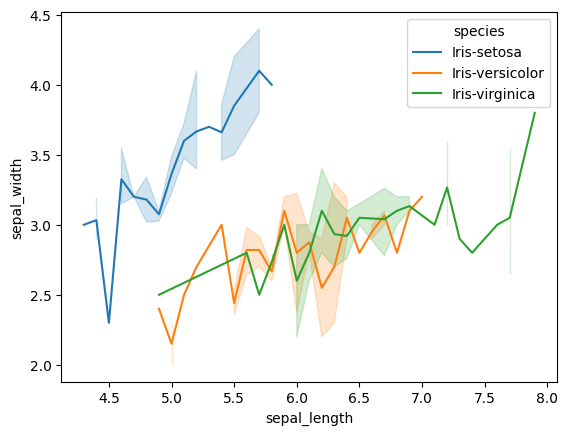

In [ ]:
sns.lineplot(x='sepal_length',y='sepal_width',hue='species',data=data)

<Axes: >

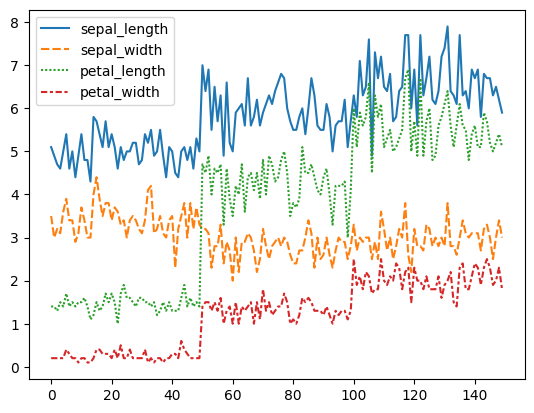

In [ ]:
sns.lineplot(data=data.drop('species',axis=1))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

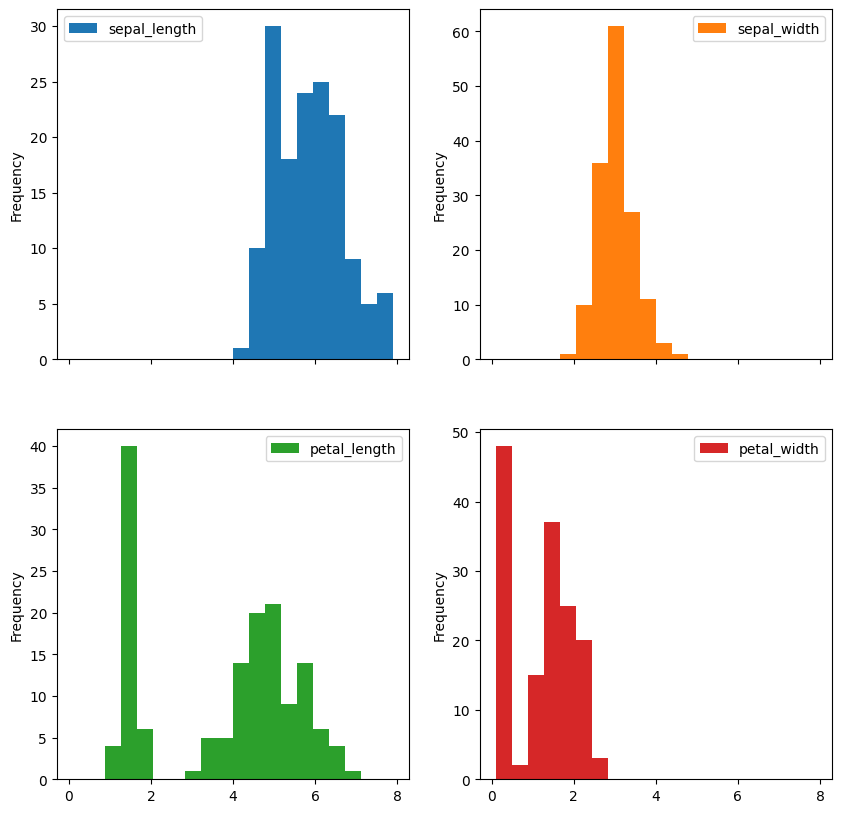

In [ ]:
data.plot.hist(subplots=True,layout=(2,2),figsize=(10,10),bins=20)

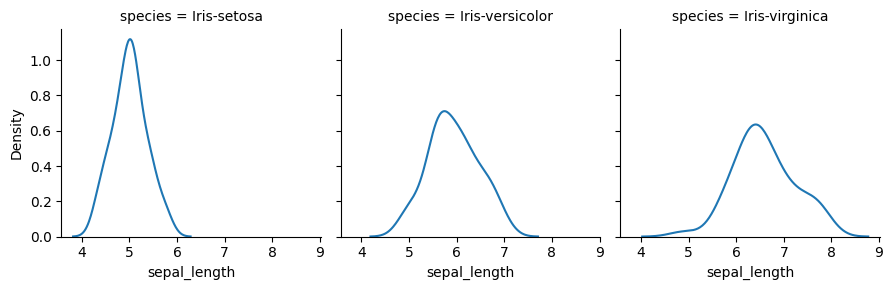

In [ ]:
g = sns.FacetGrid(data, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

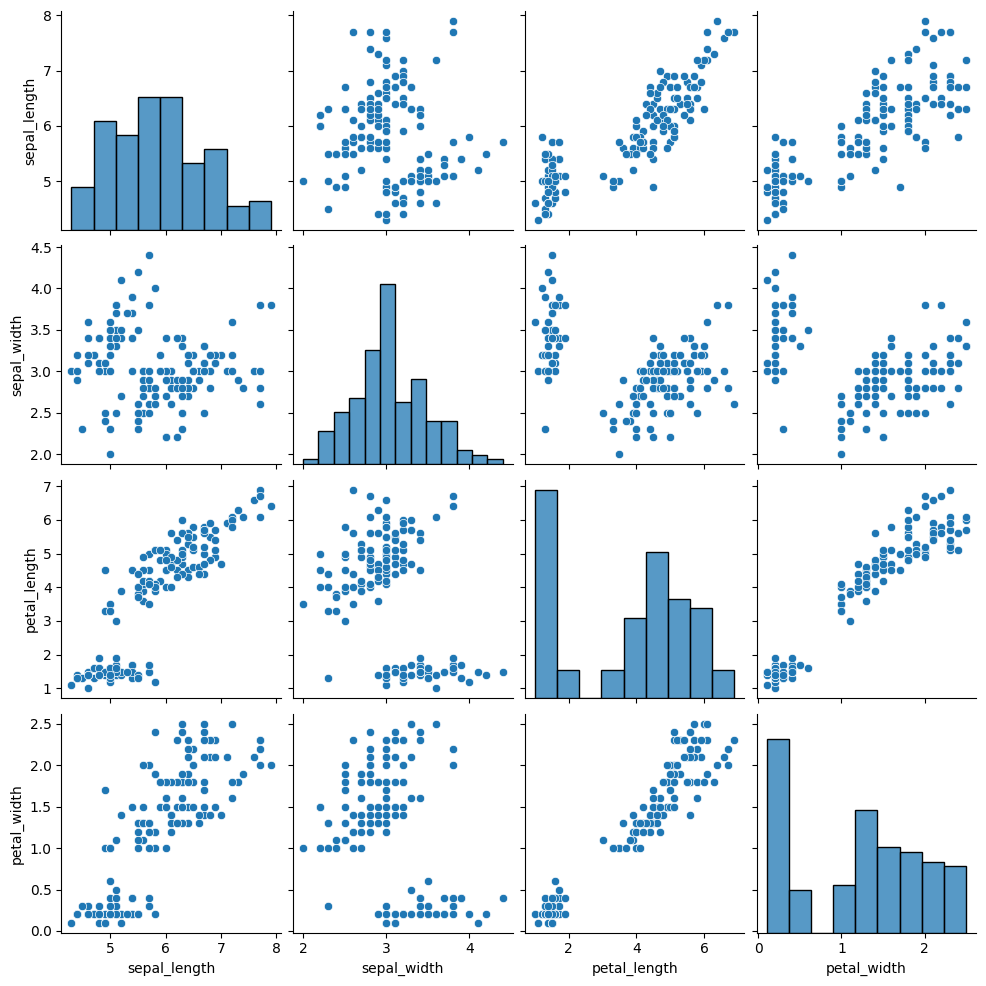

In [ ]:
sns.pairplot(data)


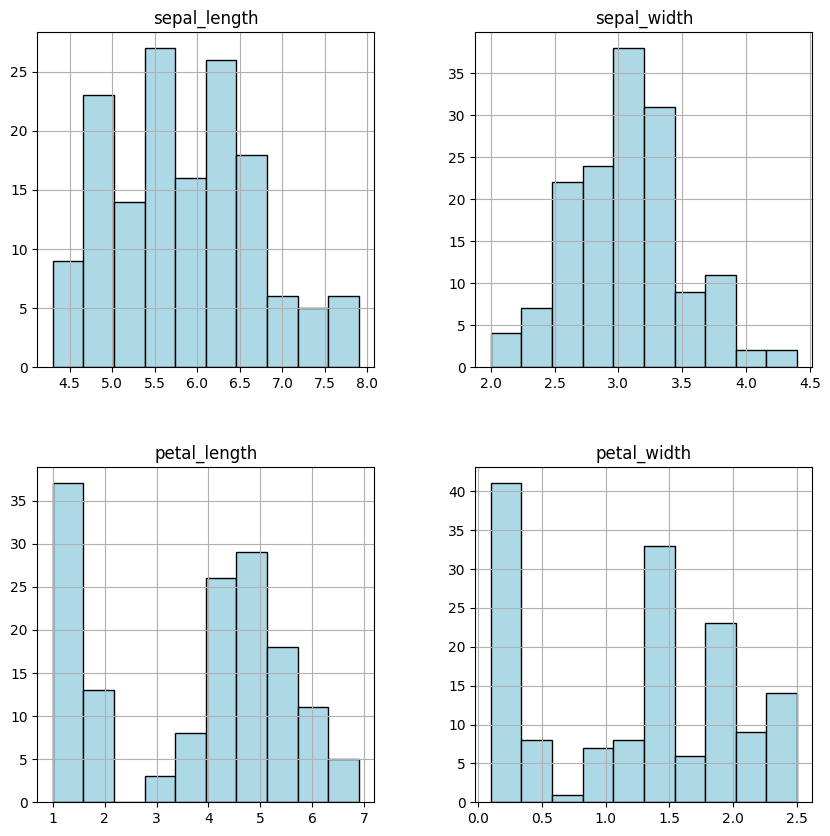

In [ ]:
data.hist(color= 'lightblue' ,edgecolor='black',figsize=(10,10))
plt.show()


<Axes: xlabel='sepal_length', ylabel='Count'>

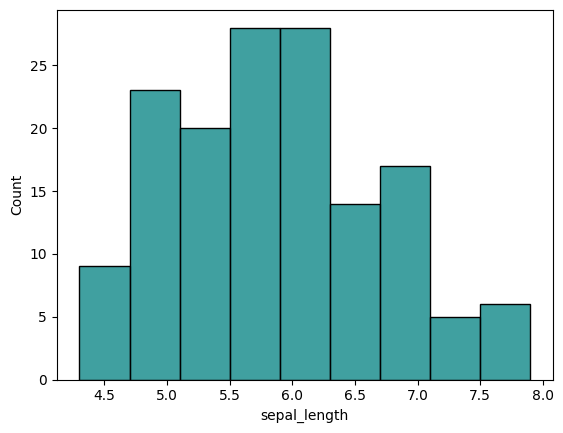

In [ ]:
sns.histplot(x=data.sepal_length, data=data, color='teal' )

<Axes: xlabel='sepal_width', ylabel='Count'>

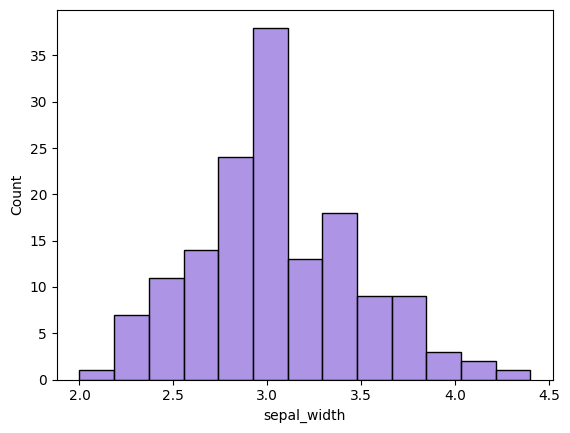

In [ ]:
sns.histplot(x=data.sepal_width , data=data, color='mediumpurple' )

<Axes: xlabel='petal_length', ylabel='Count'>

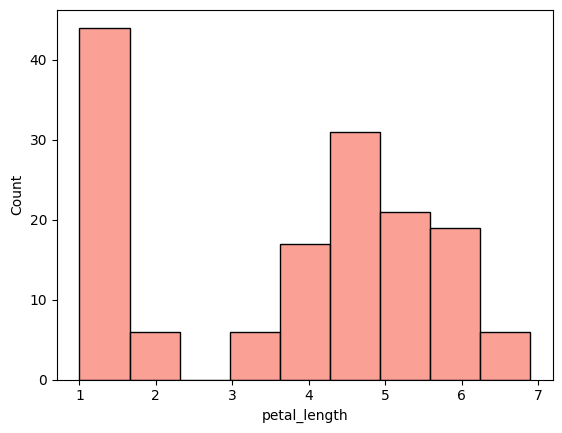

In [ ]:
sns.histplot(x=data.petal_length, data=data, color='salmon' )


<Axes: xlabel='petal_width', ylabel='Count'>

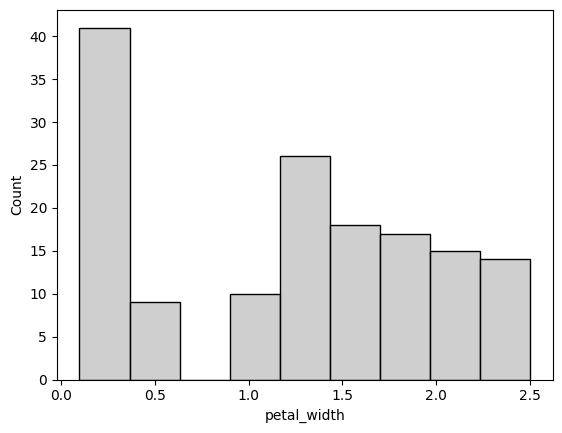

In [ ]:
sns.histplot(x=data.petal_width, data=data, color='silver' )

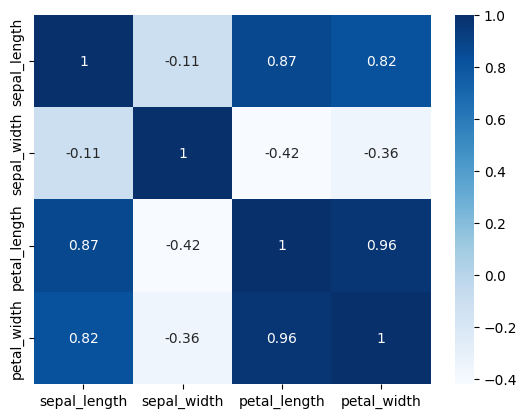

In [ ]:

data['species'] = data['species'].astype('category')
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True,cmap='Blues')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x = data.drop('species', axis=1)
y= data.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9833333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

0.9333333333333333

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

rf.score(x_test, y_test)

0.95

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

nb.score(x_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

logreg.score(x_test, y_test)

0.9833333333333333

In [ ]:
logreg.score(x_train,y_train)

0.9666666666666667